In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'/content/hotel_bookings.csv')

In [54]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [59]:
missing_df = df.isnull().sum()
missing_df_percentage = missing_df/len(df)*100
missing_values = pd.DataFrame({'missing_count':missing_df.sort_values(ascending=False),'missing_percentage':missing_df_percentage.sort_values(ascending=False)})
missing_values

,missing_count,missing_percentage
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
hotel,0,0.000000
is_canceled,0,0.000000
stays_in_weekend_nights,0,0.000000
arrival_date_day_of_month,0,0.000000


In [60]:
df.head()[['company','agent']]
dummy = df[['company','agent']].dropna()
dummy.head()

,company,agent
2392,113.0,240.0
2697,281.0,185.0
2867,281.0,334.0
2877,281.0,328.0
2878,281.0,326.0


In [61]:
df.fillna(0)[['company','agent']]

,company,agent
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,304.0
4,0.0,240.0
...,...,...
119385,0.0,394.0
119386,0.0,9.0
119387,0.0,9.0
119388,0.0,89.0


In [62]:
dummy = df[['children','country']].dropna()
dummy.dropna().head()

,children,country
0,0.0,PRT
1,0.0,PRT
2,0.0,GBR
3,0.0,GBR
4,0.0,GBR


In [63]:
df['children'].fillna(0)

,children
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
119385,0.0
119386,0.0
119387,0.0
119388,0.0


In [64]:
most_freq_country = df['country'].groupby(df['country']).count().sort_values(ascending=False)
df['country'].fillna(most_freq_country.index[0])

,country
0,PRT
1,PRT
2,GBR
3,GBR
4,GBR
...,...
119385,BEL
119386,FRA
119387,DEU
119388,GBR


In [66]:
df.drop_duplicates(inplace=True)
df.shape
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [68]:
df['adr'] = np.where(df['adr'] > 1000, 1000, df['adr'])

In [69]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [71]:
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'   # %B = full month name
)
df[['arrival_date','reservation_status_date']].head()

,arrival_date,reservation_status_date
0,2015-07-01,2015-07-01
1,2015-07-01,2015-07-01
2,2015-07-01,2015-07-02
3,2015-07-01,2015-07-02
4,2015-07-01,2015-07-03


In [72]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [73]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [76]:
df['is_family_flag'] = np.where((df['children'].fillna(0) + df['babies']) > 0, 'yes', 'no')
df.head()[['is_family_flag','total_nights','total_guests']]

,is_family_flag,total_nights,total_guests
0,no,0,2.0
1,no,0,2.0
2,no,1,1.0
3,no,1,1.0
4,no,2,2.0


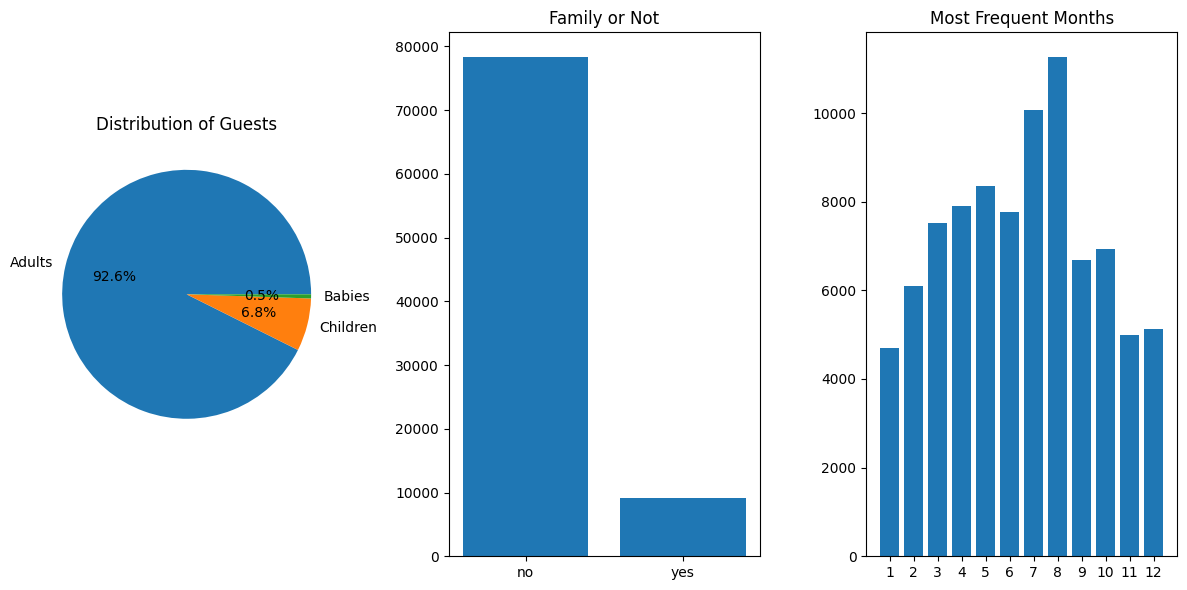

In [123]:
fig = plt.figure(figsize=(12,6))

data = {'Adults': df['adults'].sum(), 'Children': df['children'].sum(), 'Babies': df['babies'].sum()}
labels = list(data.keys())
values = list(data.values())
axs1 = fig.add_subplot(1,3,1)
axs1.pie(values, labels=labels, autopct='%1.1f%%')
axs1.set_title('Distribution of Guests')

family_or_not = df.groupby('is_family_flag')['is_family_flag'].count()
axs2 = fig.add_subplot(1,3,2)
axs2.bar(family_or_not.index, family_or_not.values)
axs2.set_title('Family or Not')

most_freq_months = df.groupby(df['arrival_date'].dt.month)['arrival_date'].count().sort_values(ascending=False)
axs3 = fig.add_subplot(1,3,3)
axs3.bar(most_freq_months.index, most_freq_months.values)
axs3.set_title('Most Frequent Months')
axs3.set_xticks(range(1, 13))

fig.tight_layout()
fig.show()

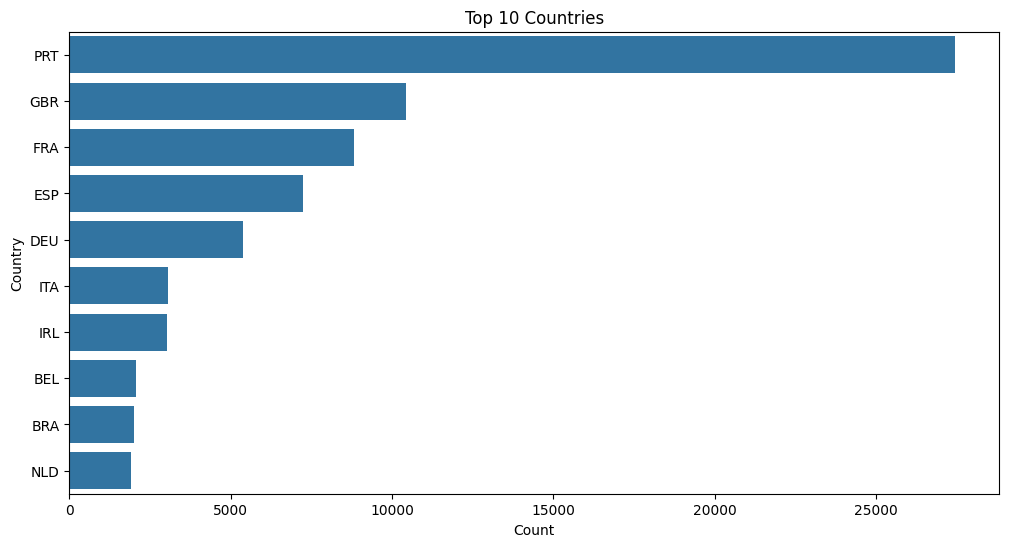

In [106]:
top_10_countries = df.groupby('country')['country'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(y=top_10_countries.index, x=top_10_countries.values)
plt.title("Top 10 Countries")
plt.ylabel("Country")
plt.xlabel("Count")
plt.show()

In [107]:
low_card_cols = ['meal', 'market_segment', 'distribution_channel','reserved_room_type', 'assigned_room_type','deposit_type', 'customer_type']

df_encoded = pd.get_dummies(df, columns=low_card_cols, drop_first=True)

In [108]:
country_freq = df['country'].value_counts(normalize=True)
df['country_freq'] = df['country'].map(country_freq)

In [109]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('is_canceled', axis=1)  # all columns except target
y = df['is_canceled']               # target

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (69916, 36)
Testing set shape: (17480, 36)
